# Log-transformed data; with OHE and no scaling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A25A8DC448>]],
      dtype=object)

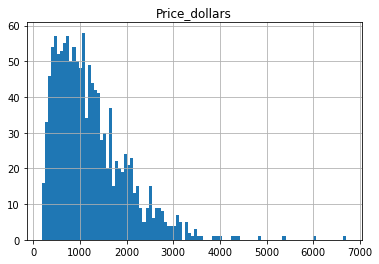

In [2]:
# Read

csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')

df.hist(column='Price_dollars', bins=100)

# #1 Linear Regression Model: 

In [3]:
df.head()
df2=df
df2

Company Memory_Structure_Categories          Gpu_Type Gpu_Company  \
0        Asus                      Hybrid  GeForce GTX 1080      Nvidia   
1      Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   
2      Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   
3      Lenovo                      Hybrid  GeForce GTX 1070      Nvidia   
4      Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   
...       ...                         ...               ...         ...   
1297  Samsung                         SSD   HD Graphics 620       Intel   
1298   Lenovo                       Flash   HD Graphics 400       Intel   
1299   Lenovo                       Flash   HD Graphics 400       Intel   
1300   Lenovo                       Flash   HD Graphics 400       Intel   
1301   Lenovo                       Flash   HD Graphics 400       Intel   

           OpSys Cpu_Company  Inches  CPU_Frequency_Numeric  Ram_Numeric  \
0     Windows 10       Intel    17.3                   2.90           32   
1     Windows 10       Intel    17.3                   2.70           32   
2     Windows 10       Intel    17.3                   2.70           16   
3     Windows 10       Intel    17.3                   2.70           32   
4     Windows 10       Intel    17.3                   2.60           16   
...          ...         ...     ...                    ...          ...   
1297  Windows 10       Intel    13.3                   2.50            8   
1298  Windows 10       Intel    10.1                   1.44            4   
1299     Android       Intel    10.1                   1.44            4   
1300  Windows 10       Intel    10.1                   1.44            4   
1301     Android       Intel    10.1                   1.44            4   

      Size_Numeric  Weight_Numeric  Price_dollars  
0              512            4.70           4279  
1              512            4.60           3564  
2              256            4.60           3025  
3              256            4.60           2929  
4              128            4.60           2519  
...            ...             ...            ...  
1297           256            0.81           1649  
1298            64            0.69            711  
1299            64            0.69            604  
1300            64            0.69            527  
1301            64            0.69            351  

[1302 rows x 12 columns]

In [4]:

df2['Log_Price_dollars'] = np.log(df2['Price_dollars'])

In [5]:
df2 = df2.drop(["Price_dollars", "Gpu_Type"], axis=1)
df2

Company Memory_Structure_Categories Gpu_Company       OpSys Cpu_Company  \
0        Asus                      Hybrid      Nvidia  Windows 10       Intel   
1      Lenovo                      Hybrid      Nvidia  Windows 10       Intel   
2      Lenovo                      Hybrid      Nvidia  Windows 10       Intel   
3      Lenovo                      Hybrid      Nvidia  Windows 10       Intel   
4      Lenovo                      Hybrid      Nvidia  Windows 10       Intel   
...       ...                         ...         ...         ...         ...   
1297  Samsung                         SSD       Intel  Windows 10       Intel   
1298   Lenovo                       Flash       Intel  Windows 10       Intel   
1299   Lenovo                       Flash       Intel     Android       Intel   
1300   Lenovo                       Flash       Intel  Windows 10       Intel   
1301   Lenovo                       Flash       Intel     Android       Intel   

      Inches  CPU_Frequency_Numeric  Ram_Numeric  Size_Numeric  \
0       17.3                   2.90           32           512   
1       17.3                   2.70           32           512   
2       17.3                   2.70           16           256   
3       17.3                   2.70           32           256   
4       17.3                   2.60           16           128   
...      ...                    ...          ...           ...   
1297    13.3                   2.50            8           256   
1298    10.1                   1.44            4            64   
1299    10.1                   1.44            4            64   
1300    10.1                   1.44            4            64   
1301    10.1                   1.44            4            64   

      Weight_Numeric  Log_Price_dollars  
0               4.70           8.361475  
1               4.60           8.178639  
2               4.60           8.014666  
3               4.60           7.982416  
4               4.60           7.831617  
...              ...                ...  
1297            0.81           7.407924  
1298            0.69           6.566672  
1299            0.69           6.403574  
1300            0.69           6.267201  
1301            0.69           5.860786  

[1302 rows x 11 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A25A8E2808>]],
      dtype=object)

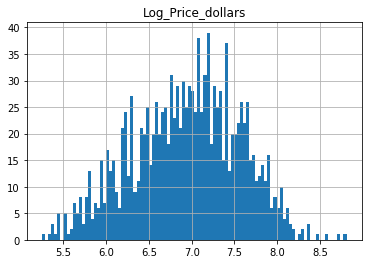

In [6]:
df2.hist(column='Log_Price_dollars', bins=100)

In [7]:
column_names_for_onehot = df2[["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"]].columns[0:]
column_names_for_onehot

Index(['Company', 'Cpu_Company', 'Memory_Structure_Categories', 'Gpu_Company',
       'OpSys'],
      dtype='object')

In [8]:
df2 = pd.get_dummies(df2, columns=column_names_for_onehot)
X = df2.drop(["Log_Price_dollars"], axis=1)
y = df2["Log_Price_dollars"]
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

(1302, 42) (1302,)


In [9]:
X

Inches  CPU_Frequency_Numeric  Ram_Numeric  Size_Numeric  \
0       17.3                   2.90           32           512   
1       17.3                   2.70           32           512   
2       17.3                   2.70           16           256   
3       17.3                   2.70           32           256   
4       17.3                   2.60           16           128   
...      ...                    ...          ...           ...   
1297    13.3                   2.50            8           256   
1298    10.1                   1.44            4            64   
1299    10.1                   1.44            4            64   
1300    10.1                   1.44            4            64   
1301    10.1                   1.44            4            64   

      Weight_Numeric  Company_Acer  Company_Apple  Company_Asus  \
0               4.70             0              0             1   
1               4.60             0              0             0   
2               4.60             0              0             0   
3               4.60             0              0             0   
4               4.60             0              0             0   
...              ...           ...            ...           ...   
1297            0.81             0              0             0   
1298            0.69             0              0             0   
1299            0.69             0              0             0   
1300            0.69             0              0             0   
1301            0.69             0              0             0   

      Company_Chuwi  Company_Dell  ...  Gpu_Company_Nvidia  OpSys_Android  \
0                 0             0  ...                   1              0   
1                 0             0  ...                   1              0   
2                 0             0  ...                   1              0   
3                 0             0  ...                   1              0   
4                 0             0  ...                   1              0   
...             ...           ...  ...                 ...            ...   
1297              0             0  ...                   0              0   
1298              0             0  ...                   0              0   
1299              0             0  ...                   0              1   
1300              0             0  ...                   0              0   
1301              0             0  ...                   0              1   

      OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  OpSys_No OS  \
0                   0            0               0            0   
1                   0            0               0            0   
2                   0            0               0            0   
3                   0            0               0            0   
4                   0            0               0            0   
...               ...          ...             ...          ...   
1297                0            0               0            0   
1298                0            0               0            0   
1299                0            0               0            0   
1300                0            0               0            0   
1301                0            0               0            0   

      OpSys_Windows 10  OpSys_Windows 10 S  OpSys_Windows 7  OpSys_macOS  
0                    1                   0                0            0  
1                    1                   0                0            0  
2                    1                   0                0            0  
3                    1                   0                0            0  
4                    1                   0                0            0  
...                ...                 ...              ...          ...  
1297                 1                   0                0            0  
1298                 1                   0                0            0  
129

In [10]:
y = df2["Log_Price_dollars"]
y

0       8.361475
1       8.178639
2       8.014666
3       7.982416
4       7.831617
          ...   
1297    7.407924
1298    6.566672
1299    6.403574
1300    6.267201
1301    5.860786
Name: Log_Price_dollars, Length: 1302, dtype: float64

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.7609624880867394


In [12]:
y_pred = model.predict(X_test)

In [13]:
type(y_test)

pandas.core.series.Series

In [14]:
result_lr = pd.DataFrame({'Actual_LR': round(np.exp(y_test),0), 
                          'Predicted_LR': np.exp(y_pred).round(0), 
                          'pctDiff_LR': round(abs((np.exp(y_pred)-np.exp(y_test))*100/np.exp(y_test)),0),
                          'Diff_LR': round((np.exp(y_pred)-np.exp(y_test)),0)})
result_lr

Actual_LR  Predicted_LR  pctDiff_LR  Diff_LR
1232      317.0         413.0        30.0     96.0
1030     2452.0        1336.0        45.0  -1116.0
163      1099.0        1085.0         1.0    -14.0
1012     1216.0        1055.0        13.0   -161.0
711       384.0         344.0        10.0    -40.0
...         ...           ...         ...      ...
34       1098.0         909.0        17.0   -189.0
85        886.0         608.0        31.0   -278.0
978       703.0         882.0        25.0    179.0
156      2299.0        1442.0        37.0   -857.0
697       736.0         710.0         4.0    -26.0

[326 rows x 4 columns]

In [15]:
result_lr[result_lr < 0].count()

Actual_LR         0
Predicted_LR      0
pctDiff_LR        0
Diff_LR         154
dtype: int64

In [16]:
result_lr.pctDiff_LR.mean()

25.162576687116566

In [17]:
np.exp(y_test).max()

6048.999999999995

In [18]:
np.exp(y_pred).max()

5076.046555103445

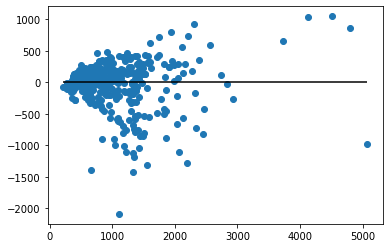

In [19]:
# Plot Residuals
plt.scatter(np.exp(y_pred), np.exp(y_pred) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred).min(), xmax=np.exp(y_pred).max())
plt.show()

# The linear model is usually underestimating how much something costs

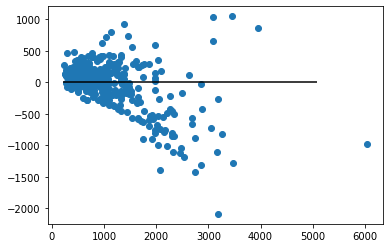

In [20]:
# Plot Residuals-like plot
plt.scatter(np.exp(y_test), np.exp(y_pred) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred).min(), xmax=np.exp(y_pred).max())
plt.show()

In [21]:
result_lr_2 = pd.DataFrame(list(zip(model.coef_, X)))
result_lr_2 = result_lr_2.sort_values(0)
result_lr_2.columns = ['Weights','Coefficient']
result_lr_2

Weights                         Coefficient
22 -0.636398                        Company_Vero
17 -0.535152                    Company_Mediacom
8  -0.400609                       Company_Chuwi
26 -0.365497   Memory_Structure_Categories_Flash
39 -0.333407                  OpSys_Windows 10 S
10 -0.299504                     Company_Fujitsu
5  -0.296882                        Company_Acer
33 -0.283857                       OpSys_Android
37 -0.240810                         OpSys_No OS
24 -0.186305                     Cpu_Company_AMD
27 -0.137262     Memory_Structure_Categories_HDD
35 -0.122012                         OpSys_Linux
7  -0.103737                        Company_Asus
15 -0.091725                      Company_Lenovo
30 -0.090764                     Gpu_Company_AMD
0  -0.069937                              Inches
34 -0.054460                     OpSys_Chrome OS
20 -0.034062                     Company_Samsung
31 -0.023949                   Gpu_Company_Intel
12 -0.002905                          Company_HP
3   0.000130                        Size_Numeric
41  0.000963                         OpSys_macOS
9   0.011148                        Company_Dell
21  0.012652                     Company_Toshiba
16  0.012883                         Company_MSI
4   0.020661                      Weight_Numeric
2   0.045030                         Ram_Numeric
13  0.047698                      Company_Huawei
32  0.114713                  Gpu_Company_Nvidia
38  0.118810                    OpSys_Windows 10
23  0.137323                      Company_Xiaomi
19  0.154716                       Company_Razer
25  0.186305                   Cpu_Company_Intel
29  0.234338     Memory_Structure_Categories_SSD
28  0.268421  Memory_Structure_Categories_Hybrid
1   0.281138               CPU_Frequency_Numeric
14  0.288404                          Company_LG
40  0.435258                     OpSys_Windows 7
36  0.479515                      OpSys_Mac OS X
6   0.480479                       Company_Apple
18  0.621345                   Company_Microsoft
11  0.634325                      Company_Google

In [22]:
print(model.intercept_)

6.538329085445509


# #2 RF regressor model

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

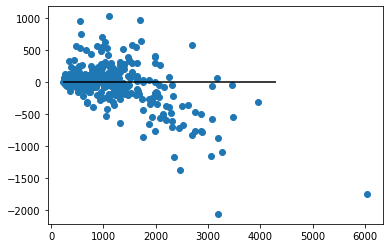

In [24]:
plt.scatter(np.exp(y_test), np.exp(y_pred) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred).min(), xmax=np.exp(y_pred).max())
plt.show()

In [25]:
result_rf = pd.DataFrame({'Actual_RF': round(np.exp(y_test),0), 
                          'Predicted_RF': np.exp(y_pred).round(0), 
                          'pctDiff_RF': round(abs((np.exp(y_pred)-np.exp(y_test))*100/np.exp(y_test)),0),
                          'Diff_RF': round((np.exp(y_pred)-np.exp(y_test)),0)})
result_rf

Actual_RF  Predicted_RF  pctDiff_RF  Diff_RF
1232      317.0         364.0        15.0     47.0
1030     2452.0        1742.0        29.0   -710.0
163      1099.0         916.0        17.0   -183.0
1012     1216.0        1095.0        10.0   -121.0
711       384.0         351.0         9.0    -33.0
...         ...           ...         ...      ...
34       1098.0        2130.0        94.0   1032.0
85        886.0         682.0        23.0   -204.0
978       703.0         810.0        15.0    107.0
156      2299.0        1811.0        21.0   -488.0
697       736.0         591.0        20.0   -145.0

[326 rows x 4 columns]

In [26]:
result_rf.pctDiff_RF.mean()

18.680981595092025

# #3. Neural Network

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
NN_model = Sequential()
# The Input Layer :
NN_model.add(Dense(84, kernel_initializer='normal',input_dim = 42, activation='relu'))
# The Hidden Layers :
NN_model.add(Dense(42, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(42, kernel_initializer='normal',activation='sigmoid'))
NN_model.add(Dense(42, kernel_initializer='normal',activation='tanh'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
# Compile the network :
import keras.backend as K
NN_model.compile(optimizer='adam', loss='mean_absolute_error', metrics= ['binary_accuracy'])
NN_model.summary()
NN_model.fit(
    X_train,
    y_train,
    epochs=500,
    shuffle=True,
    verbose=2
)
NN_predictions0 = NN_model.predict(X_test)
NN_predictions1 = []
for NN in NN_predictions0:
    NN_predictions1.append(NN[0])

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 84)                3612      
_________________________________________________________________
dense_2 (Dense)              (None, 42)                3570      
_________________________________________________________________
dense_3 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_4 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 43        
Total params: 10,837
Trainable params: 10,837
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
 - 1s - loss: 6.1582 - binary_accuracy: 0.0000e+00
Epoch 2/500
 - 0s - loss: 3.9119 - binary_accuracy: 0

 - 0s - loss: 0.2176 - binary_accuracy: 0.0000e+00
Epoch 114/500
 - 0s - loss: 0.2059 - binary_accuracy: 0.0000e+00
Epoch 115/500
 - 0s - loss: 0.2069 - binary_accuracy: 0.0000e+00
Epoch 116/500
 - 0s - loss: 0.2142 - binary_accuracy: 0.0000e+00
Epoch 117/500
 - 0s - loss: 0.2003 - binary_accuracy: 0.0000e+00
Epoch 118/500
 - 0s - loss: 0.2166 - binary_accuracy: 0.0000e+00
Epoch 119/500
 - 0s - loss: 0.2150 - binary_accuracy: 0.0000e+00
Epoch 120/500
 - 0s - loss: 0.2224 - binary_accuracy: 0.0000e+00
Epoch 121/500
 - 0s - loss: 0.2285 - binary_accuracy: 0.0000e+00
Epoch 122/500
 - 0s - loss: 0.2094 - binary_accuracy: 0.0000e+00
Epoch 123/500
 - 0s - loss: 0.2009 - binary_accuracy: 0.0000e+00
Epoch 124/500
 - 0s - loss: 0.2043 - binary_accuracy: 0.0000e+00
Epoch 125/500
 - 0s - loss: 0.2062 - binary_accuracy: 0.0000e+00
Epoch 126/500
 - 0s - loss: 0.1988 - binary_accuracy: 0.0000e+00
Epoch 127/500
 - 0s - loss: 0.2035 - binary_accuracy: 0.0000e+00
Epoch 128/500
 - 0s - loss: 0.2059 - bi

Epoch 240/500
 - 0s - loss: 0.1990 - binary_accuracy: 0.0000e+00
Epoch 241/500
 - 0s - loss: 0.1836 - binary_accuracy: 0.0000e+00
Epoch 242/500
 - 0s - loss: 0.1856 - binary_accuracy: 0.0000e+00
Epoch 243/500
 - 0s - loss: 0.1948 - binary_accuracy: 0.0000e+00
Epoch 244/500
 - 0s - loss: 0.1817 - binary_accuracy: 0.0000e+00
Epoch 245/500
 - 0s - loss: 0.1888 - binary_accuracy: 0.0000e+00
Epoch 246/500
 - 0s - loss: 0.1898 - binary_accuracy: 0.0000e+00
Epoch 247/500
 - 0s - loss: 0.1896 - binary_accuracy: 0.0000e+00
Epoch 248/500
 - 0s - loss: 0.1842 - binary_accuracy: 0.0000e+00
Epoch 249/500
 - 0s - loss: 0.1866 - binary_accuracy: 0.0000e+00
Epoch 250/500
 - 0s - loss: 0.1851 - binary_accuracy: 0.0000e+00
Epoch 251/500
 - 0s - loss: 0.1792 - binary_accuracy: 0.0000e+00
Epoch 252/500
 - 0s - loss: 0.1827 - binary_accuracy: 0.0000e+00
Epoch 253/500
 - 0s - loss: 0.1813 - binary_accuracy: 0.0000e+00
Epoch 254/500
 - 0s - loss: 0.1799 - binary_accuracy: 0.0000e+00
Epoch 255/500
 - 0s - los

Epoch 367/500
 - 0s - loss: 0.1733 - binary_accuracy: 0.0000e+00
Epoch 368/500
 - 0s - loss: 0.1777 - binary_accuracy: 0.0000e+00
Epoch 369/500
 - 0s - loss: 0.1822 - binary_accuracy: 0.0000e+00
Epoch 370/500
 - 0s - loss: 0.1745 - binary_accuracy: 0.0000e+00
Epoch 371/500
 - 0s - loss: 0.1751 - binary_accuracy: 0.0000e+00
Epoch 372/500
 - 0s - loss: 0.1752 - binary_accuracy: 0.0000e+00
Epoch 373/500
 - 0s - loss: 0.1756 - binary_accuracy: 0.0000e+00
Epoch 374/500
 - 0s - loss: 0.1736 - binary_accuracy: 0.0000e+00
Epoch 375/500
 - 0s - loss: 0.1729 - binary_accuracy: 0.0000e+00
Epoch 376/500
 - 0s - loss: 0.1694 - binary_accuracy: 0.0000e+00
Epoch 377/500
 - 0s - loss: 0.1788 - binary_accuracy: 0.0000e+00
Epoch 378/500
 - 0s - loss: 0.1756 - binary_accuracy: 0.0000e+00
Epoch 379/500
 - 0s - loss: 0.1759 - binary_accuracy: 0.0000e+00
Epoch 380/500
 - 0s - loss: 0.1726 - binary_accuracy: 0.0000e+00
Epoch 381/500
 - 0s - loss: 0.1770 - binary_accuracy: 0.0000e+00
Epoch 382/500
 - 0s - los

 - 0s - loss: 0.1665 - binary_accuracy: 0.0000e+00
Epoch 494/500
 - 0s - loss: 0.1715 - binary_accuracy: 0.0000e+00
Epoch 495/500
 - 0s - loss: 0.1784 - binary_accuracy: 0.0000e+00
Epoch 496/500
 - 0s - loss: 0.1646 - binary_accuracy: 0.0000e+00
Epoch 497/500
 - 0s - loss: 0.1708 - binary_accuracy: 0.0000e+00
Epoch 498/500
 - 0s - loss: 0.1699 - binary_accuracy: 0.0000e+00
Epoch 499/500
 - 0s - loss: 0.1701 - binary_accuracy: 0.0000e+00
Epoch 500/500
 - 0s - loss: 0.1680 - binary_accuracy: 0.0000e+00


In [28]:
result_nn = pd.DataFrame({'Actual_NN': round(np.exp(y_test),0), 
                          'Predicted_NN': np.exp(NN_predictions1).round(0), 
                          'pctDiff_NN': round(abs((np.exp(NN_predictions1)-np.exp(y_test))*100/np.exp(y_test)),0),
                          'Diff_NN': round((np.exp(NN_predictions1)-np.exp(y_test)),0)})
result_nn

Actual_NN  Predicted_NN  pctDiff_NN  Diff_NN
1232      317.0         752.0       137.0    435.0
1030     2452.0        1383.0        44.0  -1069.0
163      1099.0         984.0        10.0   -115.0
1012     1216.0        1078.0        11.0   -138.0
711       384.0         323.0        16.0    -61.0
...         ...           ...         ...      ...
34       1098.0        1112.0         1.0     14.0
85        886.0         566.0        36.0   -320.0
978       703.0         657.0         7.0    -46.0
156      2299.0        1078.0        53.0  -1221.0
697       736.0         637.0        13.0    -99.0

[326 rows x 4 columns]

In [29]:
result_nn.pctDiff_NN.mean()

19.478527607361965

In [30]:
result_nn

Actual_NN  Predicted_NN  pctDiff_NN  Diff_NN
1232      317.0         752.0       137.0    435.0
1030     2452.0        1383.0        44.0  -1069.0
163      1099.0         984.0        10.0   -115.0
1012     1216.0        1078.0        11.0   -138.0
711       384.0         323.0        16.0    -61.0
...         ...           ...         ...      ...
34       1098.0        1112.0         1.0     14.0
85        886.0         566.0        36.0   -320.0
978       703.0         657.0         7.0    -46.0
156      2299.0        1078.0        53.0  -1221.0
697       736.0         637.0        13.0    -99.0

[326 rows x 4 columns]

# Combine predicted values by different ML algorithms

In [31]:
df_full = df2.join([result_lr,result_rf,result_nn], how="inner")
df_full

Inches  CPU_Frequency_Numeric  Ram_Numeric  Size_Numeric  \
6       17.3                   2.80           32          1000   
8       17.3                   2.80           32           512   
12      17.3                   2.60           32           256   
19      17.3                   2.80           16           512   
27      17.3                   2.80           16           256   
...      ...                    ...          ...           ...   
1274    15.6                   1.80            8           512   
1276    11.6                   1.60            4           256   
1284    12.5                   1.20            8           512   
1292    12.0                   1.20            8           256   
1299    10.1                   1.44            4            64   

      Weight_Numeric  Log_Price_dollars  Company_Acer  Company_Apple  \
6               4.42           8.280964             0              0   
8               4.42           8.149602             0              0   
12              4.42           8.032685             0              0   
19              4.36           8.151622             0              0   
27              4.20           7.958227             1              0   
...              ...                ...           ...            ...   
1274            1.09           7.835579             0              0   
1276            1.08           6.961296             0              1   
1284            0.99           7.338888             0              0   
1292            0.92           7.236339             0              1   
1299            0.69           6.403574             0              0   

      Company_Asus  Company_Chuwi  ...  pctDiff_LR  Diff_LR  Actual_RF  \
6                0              0  ...        22.0    857.0     3948.0   
8                0              0  ...        30.0   1047.0     3462.0   
12               0              0  ...        34.0   1043.0     3080.0   
19               0              0  ...        37.0  -1278.0     3469.0   
27               0              0  ...        46.0  -1307.0     2859.0   
...            ...            ...  ...         ...      ...        ...   
1274             0              0  ...        47.0  -1181.0     2529.0   
1276             0              0  ...        23.0    244.0     1055.0   
1284             0              0  ...        37.0   -574.0     1539.0   
1292             0              0  ...        10.0    132.0     1389.0   
1299             0              0  ...        42.0   -253.0      604.0   

      Predicted_RF  pctDiff_RF  Diff_RF  Actual_NN  Predicted_NN  pctDiff_NN  \
6           3636.0         8.0   -312.0     3948.0        3547.0        10.0   
8           3414.0         1.0    -48.0     3462.0        3520.0         2.0   
12          3016.0         2.0    -64.0     3080.0        2782.0        10.0   
19          2930.0        16.0   -539.0     3469.0        2607.0        25.0   
27          2366.0        17.0   -493.0     2859.0        2164.0        24.0   
...            ...         ...      ...        ...           ...         ...   
1274        1857.0        27.0   -672.0     2529.0        1889.0        25.0   
1276         524.0        50.0   -531.0     1055.0        1111.0         5.0   
1284        1844.0        20.0    305.0     1539.0        1930.0        25.0   
1292        1592.0        15.0    203.0     1389.0        1397.0         1.0   
1299         396.0        35.0   -208.0      604.0         340.0        44.0   

      Diff_NN  
6      -401.0  
8        58.0  
12     -298.0  
19     -862.0  
27     -695.0  
...       ...  
1274   -640.0  
1276     56.0  
1284    391.0  
1292      8.0  
1299   -264.0  

[326 rows x 55 columns]

In [32]:
df_full.to_csv("combined_results.csv", encoding="utf-8", index=False)

In [33]:
df_full_name = df.join([result_lr,result_rf,result_nn], how="inner")
df_full_name

Company Memory_Structure_Categories           Gpu_Type Gpu_Company  \
6       Dell                      Hybrid  GeForce GTX 1070M      Nvidia   
8       Dell                      Hybrid   GeForce GTX 1070      Nvidia   
12      Dell                      Hybrid   GeForce GTX 1070      Nvidia   
19      Dell                      Hybrid   GeForce GTX 1070      Nvidia   
27      Acer                      Hybrid   GeForce GTX 1070      Nvidia   
...      ...                         ...                ...         ...   
1274      LG                         SSD    HD Graphics 620       Intel   
1276   Apple                       Flash   HD Graphics 6000       Intel   
1284  Lenovo                         SSD    HD Graphics 515       Intel   
1292   Apple                         SSD    HD Graphics 615       Intel   
1299  Lenovo                       Flash    HD Graphics 400       Intel   

           OpSys Cpu_Company  Inches  CPU_Frequency_Numeric  Ram_Numeric  \
6     Windows 10       Intel    17.3                   2.80           32   
8     Windows 10       Intel    17.3                   2.80           32   
12    Windows 10       Intel    17.3                   2.60           32   
19    Windows 10       Intel    17.3                   2.80           16   
27    Windows 10       Intel    17.3                   2.80           16   
...          ...         ...     ...                    ...          ...   
1274  Windows 10       Intel    15.6                   1.80            8   
1276    Mac OS X       Intel    11.6                   1.60            4   
1284  Windows 10       Intel    12.5                   1.20            8   
1292       macOS       Intel    12.0                   1.20            8   
1299     Android       Intel    10.1                   1.44            4   

      Size_Numeric  ...  pctDiff_LR  Diff_LR  Actual_RF  Predicted_RF  \
6             1000  ...        22.0    857.0     3948.0        3636.0   
8              512  ...        30.0   1047.0     3462.0        3414.0   
12             256  ...        34.0   1043.0     3080.0        3016.0   
19             512  ...        37.0  -1278.0     3469.0        2930.0   
27             256  ...        46.0  -1307.0     2859.0        2366.0   
...            ...  ...         ...      ...        ...           ...   
1274           512  ...        47.0  -1181.0     2529.0        1857.0   
1276           256  ...        23.0    244.0     1055.0         524.0   
1284           512  ...        37.0   -574.0     1539.0        1844.0   
1292           256  ...        10.0    132.0     1389.0        1592.0   
1299            64  ...        42.0   -253.0      604.0         396.0   

      pctDiff_RF  Diff_RF  Actual_NN  Predicted_NN  pctDiff_NN  Diff_NN  
6            8.0   -312.0     3948.0        3547.0        10.0   -401.0  
8            1.0    -48.0     3462.0        3520.0         2.0     58.0  
12           2.0    -64.0     3080.0        2782.0        10.0   -298.0  
19          16.0   -539.0     3469.0        2607.0        25.0   -862.0  
27          17.0   -493.0     2859.0        2164.0        24.0   -695.0  
...          ...      ...        ...           ...         ...      ...  
1274        27.0   -672.0     2529.0        1889.0        25.0   -640.0  
1276        50.0   -531.0     1055.0        1111.0         5.0     56.0  
1284        20.0    305.0     1539.0        1930.0        25.0    391.0  
1292        15.0    203.0     1389.0        1397.0         1.0      8.0  
1299        35.0   -208.0      604.0         340.0        44.0   -264.0  

[326 rows x 25 columns]

In [46]:
# Read

csv_path = "laptops_allinfo.csv"
allinfo_df = pd.read_csv(csv_path,encoding='latin-1')

In [47]:
allinfo_df["concat"] = allinfo_df["concat"].astype(str)
allinfo_df.set_index("concat")

Product  \
concat                                                                                   
6709Windows 10Intel3217.3Nvidia GeForce GTX 1080                             Blade Pro   
6049Windows 10Intel3217.3Nvidia GeForce GTX 1080                             Blade Pro   
5389Windows 10Intel3215.6Nvidia Quadro M2200M                             Thinkpad P51   
4828Windows 7Intel1617.3Nvidia Quadro M2000M                                  Zbook 17   
4373Windows 10Intel6417.3Nvidia GeForce GTX 980                             ROG G701VO   
...                                                                                ...   
219Windows 10AMD214AMD Radeon R2                  E402WA-GA010T (E2-6110/2GB/32GB/W10)   
219Chrome OSIntel215.6Intel HD Graphics                           Chromebook C910-C2ST   
216Windows 10Intel413.3Intel HD Graphics 400          V131 (X5-Z8350/4GB/32GB/FHD/W10)   
211Windows 10Intel211.6Intel HD Graphics 400                           Vivobook E200HA   
191Chrome OSIntel211.6Intel HD Graphics               C740-C9QX (3205U/2GB/32GB/Chrome   

                                                                              Cpu_Full  \
concat                                                                                   
6709Windows 10Intel3217.3Nvidia GeForce GTX 1080           Intel Core i7 7820HK 2.9GHz   
6049Windows 10Intel3217.3Nvidia GeForce GTX 1080           Intel Core i7 7820HK 2.9GHz   
5389Windows 10Intel3215.6Nvidia Quadro M2200M            Intel Xeon E3-1535M v6 3.1GHz   
4828Windows 7Intel1617.3Nvidia Quadro M2000M             Intel Xeon E3-1535M v5 2.9GHz   
4373Windows 10Intel6417.3Nvidia GeForce GTX 980            Intel Core i7 6820HK 2.7GHz   
...                                                                                ...   
219Windows 10AMD214AMD Radeon R2                           AMD E-Series E2-6110 1.5GHz   
219Chrome OSIntel215.6Intel HD Graphics           Intel Celeron Dual Core 3205U 1.5GHz   
216Windows 10Intel413.3Intel HD Graphics 400               Intel Atom X5-Z8350 1.44GHz   
211Windows 10Intel211.6Intel HD Graphics 400               Intel Atom x5-Z8350 1.44GHz   
191Chrome OSIntel211.6Intel HD Graphics           Intel Celeron Dual Core 3205U 1.5GHz   

                                                         Memory_Full  \
concat                                                                 
6709Windows 10Intel3217.3Nvidia GeForce GTX 1080             1TB SSD   
6049Windows 10Intel3217.3Nvidia GeForce GTX 1080           512GB SSD   
5389Windows 10Intel3215.6Nvidia Quadro M2200M                1TB SSD   
4828Windows 7Intel1617.3Nvidia Quadro M2000M               256GB SSD   
4373Windows 10Intel6417.3Nvidia GeForce GTX 980              1TB SSD   
...                                                              ...   
219Windows 10AMD214AMD Radeon R2                  32GB Flash Storage   
219Chrome OSIntel215.6Intel HD Graphics                     16GB SSD   
216Windows 10Intel413.3Intel HD Graphics 400      32GB Flash Storage   
211Windows 10Intel211.6Intel HD Graphics 400      32GB Flash Storage   
191Chrome OSIntel211.6Intel HD Graphics                     32GB SSD   

                                                                 Gpu_Full  
concat                                                                     
6709Windows 10Intel3217.3Nvidia GeForce GTX 1080  Nvidia GeForce GTX 1080  
6049Windows 10Intel3217.3Nvidia GeForce GTX 1080  Nvidia GeForce GTX 1080  
5389Windows 10Intel3215.6Nvidia Quadro M2200M        Nvidia Quadro M2200M  
4828Windows 7Intel1617.3Nvidia Quadro M2000M         Nvidia Quadro M2000M  
4373Windows 10Intel6417.3Nvidia GeForce GTX 980   Nvidia GeForce GTX 980   
...                                                                   ...  
219Windows 10AMD214AMD Radeon R2                            AMD Radeon R2  
219Chrome OSIntel215.6Intel HD Graphics                 Intel HD Graphics  
216Windows 10Intel413.3Intel HD Graphics

In [36]:
df_full_name.dtypes

Company                         object
Memory_Structure_Categories     object
Gpu_Type                        object
Gpu_Company                     object
OpSys                           object
Cpu_Company                     object
Inches                         float64
CPU_Frequency_Numeric          float64
Ram_Numeric                      int64
Size_Numeric                     int64
Weight_Numeric                 float64
Price_dollars                    int64
Log_Price_dollars              float64
Actual_LR                      float64
Predicted_LR                   float64
pctDiff_LR                     float64
Diff_LR                        float64
Actual_RF                      float64
Predicted_RF                   float64
pctDiff_RF                     float64
Diff_RF                        float64
Actual_NN                      float64
Predicted_NN                   float32
pctDiff_NN                     float64
Diff_NN                        float64
dtype: object

In [48]:
df_full_name["concat"] = df_full_name["Price_dollars"].astype(str) + df_full_name["OpSys"] + df_full_name["Cpu_Company"] + df_full_name["Ram_Numeric"].astype(str) + df_full_name["Inches"].astype(str) + df_full_name["Gpu_Company"] + " " + df_full_name["Gpu_Type"]
df_full_name.set_index("concat")

Company  \
concat                                                      
3948Windows 10Intel3217.3Nvidia GeForce GTX 1070M    Dell   
3462Windows 10Intel3217.3Nvidia GeForce GTX 1070     Dell   
3080Windows 10Intel3217.3Nvidia GeForce GTX 1070     Dell   
3469Windows 10Intel1617.3Nvidia GeForce GTX 1070     Dell   
2859Windows 10Intel1617.3Nvidia GeForce GTX 1070     Acer   
...                                                   ...   
2529Windows 10Intel815.6Intel HD Graphics 620          LG   
1055Mac OS XIntel411.6Intel HD Graphics 6000        Apple   
1539Windows 10Intel812.5Intel HD Graphics 515      Lenovo   
1389macOSIntel812.0Intel HD Graphics 615            Apple   
604AndroidIntel410.1Intel HD Graphics 400          Lenovo   

                                                  Memory_Structure_Categories  \
concat                                                                          
3948Windows 10Intel3217.3Nvidia GeForce GTX 1070M                      Hybrid   
3462Windows 10Intel3217.3Nvidia GeForce GTX 1070                       Hybrid   
3080Windows 10Intel3217.3Nvidia GeForce GTX 1070                       Hybrid   
3469Windows 10Intel1617.3Nvidia GeForce GTX 1070                       Hybrid   
2859Windows 10Intel1617.3Nvidia GeForce GTX 1070                       Hybrid   
...                                                                       ...   
2529Windows 10Intel815.6Intel HD Graphics 620                             SSD   
1055Mac OS XIntel411.6Intel HD Graphics 6000                            Flash   
1539Windows 10Intel812.5Intel HD Graphics 515                             SSD   
1389macOSIntel812.0Intel HD Graphics 615                                  SSD   
604AndroidIntel410.1Intel HD Graphics 400                               Flash   

                                                            Gpu_Type  \
concat                                                                 
3948Windows 10Intel3217.3Nvidia GeForce GTX 1070M  GeForce GTX 1070M   
3462Windows 10Intel3217.3Nvidia GeForce GTX 1070    GeForce GTX 1070   
3080Windows 10Intel3217.3Nvidia GeForce GTX 1070    GeForce GTX 1070   
3469Windows 10Intel1617.3Nvidia GeForce GTX 1070    GeForce GTX 1070   
2859Windows 10Intel1617.3Nvidia GeForce GTX 1070    GeForce GTX 1070   
...                                                              ...   
2529Windows 10Intel815.6Intel HD Graphics 620        HD Graphics 620   
1055Mac OS XIntel411.6Intel HD Graphics 6000        HD Graphics 6000   
1539Windows 10Intel812.5Intel HD Graphics 515        HD Graphics 515   
1389macOSIntel812.0Intel HD Graphics 615             HD Graphics 615   
604AndroidIntel410.1Intel HD Graphics 400            HD Graphics 400   

                                                  Gpu_Company       OpSys  \
concat                                                                      
3948Windows 10Intel3217.3Nvidia GeForce GTX 1070M      Nvidia  Windows 10   
3462Windows 10Intel3217.3Nvidia GeForce GTX 1070       Nvidia  Windows 10   
3080Windows 10Intel3217.3Nvidia GeForce GTX 1070       Nvidia  Windows 10   
3469Windows 10Intel1617.3Nvidia GeForce GTX 1070       Nvidia  Windows 10   
2859Windows 10Intel1617.3Nvidia GeForce GTX 1070       Nvidia  Windows 10   
...                                                       ...         ...   
2529Windows 10Intel815.6Intel HD Graphics 620           Intel  Windows 10   
1055Mac OS XIntel411.6Intel HD Graphics 6000            Intel    Mac OS X   
1539Windows 10Intel812.5Intel HD Graphics 515           Intel  Windows 10   
1389macOSIntel812.0Intel HD Graphics 615                Intel       macOS   
604AndroidIntel410.1Intel HD Graphics 400               Intel     Android   

                                                  Cpu_Company  Inches  \
concat                                                                  
3948Windows 10Intel3217.3Nvidia GeForce GTX 1070M       Intel    17.3   
3462Windows 10Intel3217.3Nvidia GeForce GTX 

In [62]:
df_full_name2 = pd.merge(df_full_name, allinfo_df, on='concat', how='inner')
df_full_name2

Company Memory_Structure_Categories           Gpu_Type Gpu_Company  \
0      Dell                      Hybrid  GeForce GTX 1070M      Nvidia   
1      Dell                      Hybrid   GeForce GTX 1070      Nvidia   
2      Dell                      Hybrid   GeForce GTX 1070      Nvidia   
3      Dell                      Hybrid   GeForce GTX 1070      Nvidia   
4      Acer                      Hybrid   GeForce GTX 1070      Nvidia   
..      ...                         ...                ...         ...   
306    Asus                       Flash    HD Graphics 500       Intel   
307      LG                         SSD    HD Graphics 620       Intel   
308   Apple                       Flash   HD Graphics 6000       Intel   
309  Lenovo                         SSD    HD Graphics 515       Intel   
310  Lenovo                       Flash    HD Graphics 400       Intel   

          OpSys Cpu_Company  Inches  CPU_Frequency_Numeric  Ram_Numeric  \
0    Windows 10       Intel    17.3                   2.80           32   
1    Windows 10       Intel    17.3                   2.80           32   
2    Windows 10       Intel    17.3                   2.60           32   
3    Windows 10       Intel    17.3                   2.80           16   
4    Windows 10       Intel    17.3                   2.80           16   
..          ...         ...     ...                    ...          ...   
306  Windows 10       Intel    11.6                   1.10            2   
307  Windows 10       Intel    15.6                   1.80            8   
308    Mac OS X       Intel    11.6                   1.60            4   
309  Windows 10       Intel    12.5                   1.20            8   
310     Android       Intel    10.1                   1.44            4   

     Size_Numeric  ...  Diff_RF  Actual_NN  Predicted_NN  pctDiff_NN  Diff_NN  \
0            1000  ...   -312.0     3948.0        3547.0        10.0   -401.0   
1             512  ...    -48.0     3462.0        3520.0         2.0     58.0   
2             256  ...    -64.0     3080.0        2782.0        10.0   -298.0   
3             512  ...   -539.0     3469.0        2607.0        25.0   -862.0   
4             256  ...   -493.0     2859.0        2164.0        24.0   -695.0   
..            ...  ...      ...        ...           ...         ...      ...   
306            32  ...    -26.0      270.0         189.0        30.0    -81.0   
307           512  ...   -672.0     2529.0        1889.0        25.0   -640.0   
308           256  ...   -531.0     1055.0        1111.0         5.0     56.0   
309           512  ...    305.0     1539.0        1930.0        25.0    391.0   
310            64  ...   -208.0      604.0         340.0        44.0   -264.0   

                                                concat          Product  \
0    3948Windows 10Intel3217.3Nvidia GeForce GTX 1070M     Alienware 17   
1     3462Windows 10Intel3217.3Nvidia GeForce GTX 1070     Alienware 17   
2     3080Windows 10Intel3217.3Nvidia GeForce GTX 1070     Alienware 17   
3     3469Windows 10Intel1617.3Nvidia GeForce GTX 1070     Alienware 17   
4     2859Windows 10Intel1617.3Nvidia GeForce GTX 1070  Predator G9-793   
..                                                 ...              ...   
306       270Windows 10Intel211.6Intel HD Graphics 500     VivoBook E12   
307      2529Windows 10Intel815.6Intel HD Graphics 620      Gram 15Z975   
308       1055Mac OS XIntel411.6Intel HD Graphics 6000      MacBook Air   
309      1539Windows 10Intel812.5Intel HD Graphics 515  Yoga 900S-12ISK   
310          604AndroidIntel410.1Intel HD Graphics 400        Yoga Book   

                                 Cpu_Full           Memory_Full  \
0             Intel Core i7 7700HQ 2.8GHz    1TB SSD +  1TB HDD   
1             Intel Core i7 7700HQ 2.8GHz  512GB SSD +  1TB HDD   
2             Intel Core i7 6700HQ 2.6GHz  256GB SSD +  1TB HDD   
3             Intel Core i7 7700HQ 2.8GHz  512GB SSD +  1TB HDD   
4    

In [65]:
df_full_name2 = df_full_name2.drop(["concat"], axis=1)

In [66]:
df_full_name2.to_csv("combined_results_names.csv", encoding="utf-8", index=False)

In [67]:
df_full_name2.to_json("combined_results_names.json",orient = "records")